In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../utils/')
import src_utils
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import scipy

from matplotlib import pyplot as plt
from matplotlib.colors import rgb2hex
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

import numpy as np
np.set_printoptions(precision=5, suppress=True)

# 1. Set rcParams

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rcParams['axes.linewidth'] = 0.5

plt.rcParams["figure.dpi"] = 300

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

# 2. Set up grid

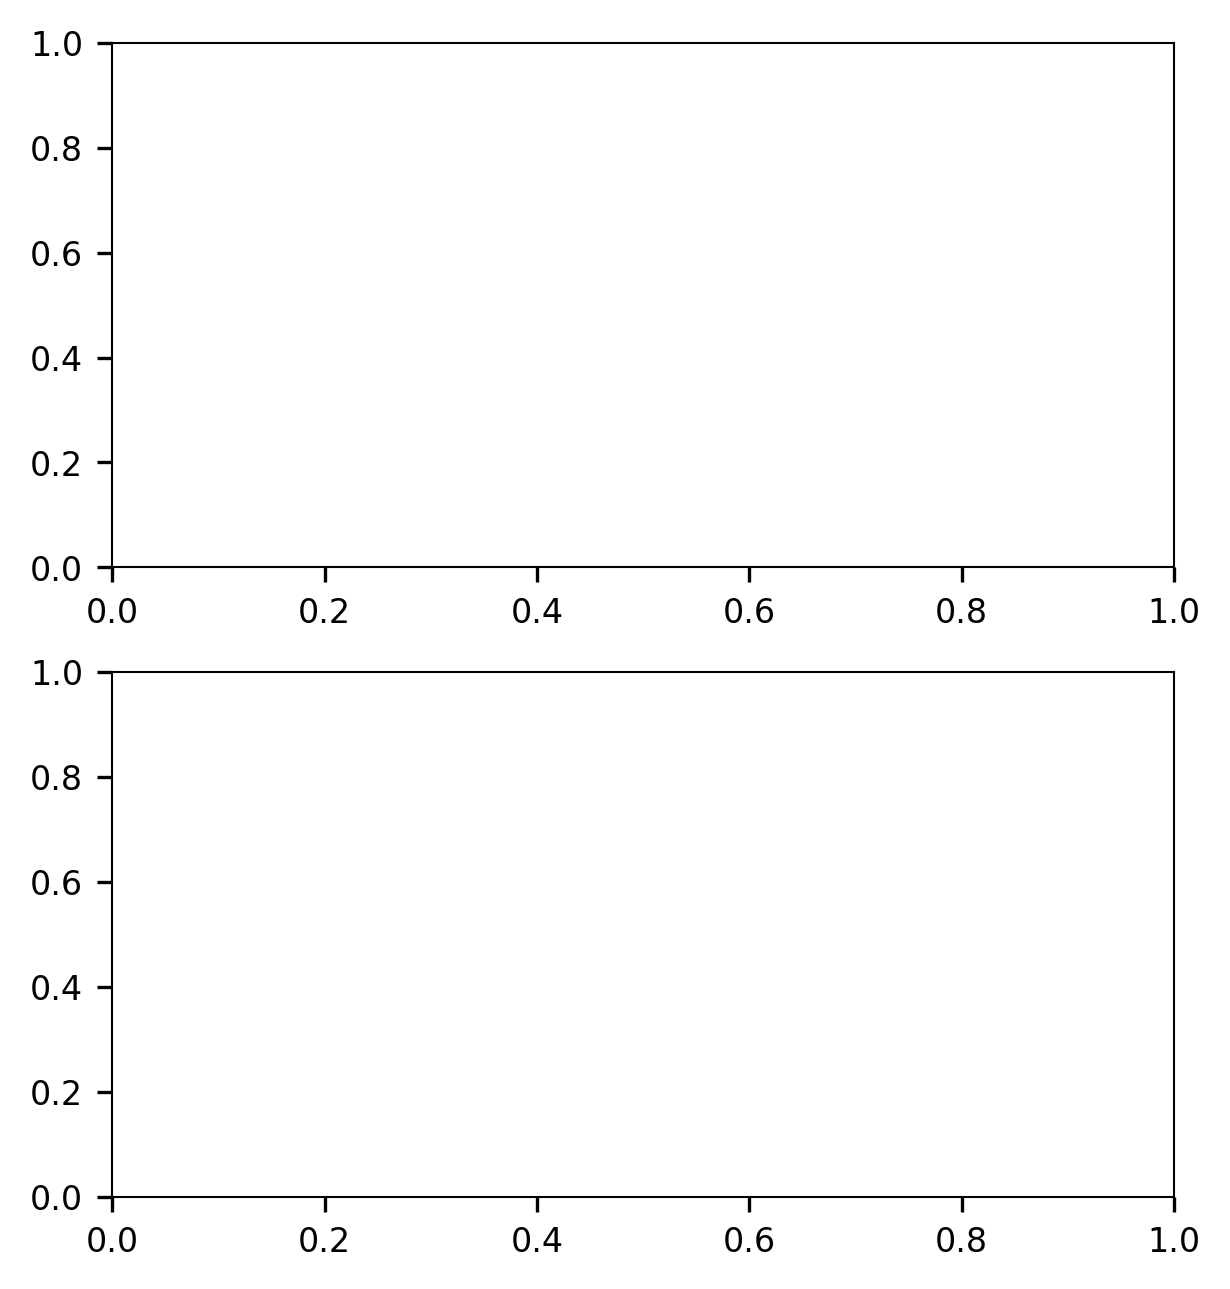

In [3]:
width = 116 / 25.4
height = 200 / 25.4
fig3 = plt.figure(constrained_layout=False, figsize=(width, height))

# First 3/5 of heatmap
gs1 = fig3.add_gridspec(ncols=3, nrows=3)

# Heatmaps
f3_ax1 = fig3.add_subplot(gs1[0, :])
f3_ax2 = fig3.add_subplot(gs1[1, :])


# 3. Read in data

In [4]:
# Read in data
#resid_heatmap = pd.read_csv('../../heatmaps/raw_resid_heatmap.csv', index_col=0)
resid_heatmap = pd.read_csv('../utils/diffsel_calib_map.csv', index_col=0) #NAMED resid_map for easy replotting

cutoff = int(250 * (1/2))
fsize = 6
pos_interval = 5

# Get WTaa index positions and plot dots
aa_seq = src_utils.__aa_seq__
wt_aa_x_idx = np.zeros(len(aa_seq))
for idx, aa in enumerate(aa_seq):
    wt_aa_x_idx[idx] = src_utils.__aa_idx_dict__[aa]

# Set syn values to 0.0
syn_mask = np.zeros((250, 21))
for pos, idx in zip(np.arange(250), wt_aa_x_idx):
    syn_mask[pos, int(idx)] = 1.
syn_mask = syn_mask.astype(bool)
resid_heatmap.values[syn_mask] = 0.

# Set colormap NaNs to gray
current_cmap = matplotlib.cm.get_cmap('bwr')
current_cmap.set_bad(color='lightgrey')
divnorm = DivergingNorm(vmin=-3, vcenter=0, vmax=2)

## First row
#f3_ax1.imshow(resid_heatmap.T.values[:, :cutoff], cmap='bwr', vmin=-3, vmax=3)
f3_ax1.pcolormesh(resid_heatmap.T.values[:, :cutoff], cmap='bwr', norm=divnorm)
f3_ax1.scatter(x=np.arange(len(aa_seq))[:cutoff] + 0.5, y=wt_aa_x_idx[:cutoff] + 0.5, s=0.5, marker='.', c='k')

# Set ticks
f3_ax1.set_yticks(np.arange(21) + 0.5)
f3_ax1.set_yticklabels(list(src_utils.__aa_idx_dict__.keys()), fontsize=fsize)
f3_ax1.set_xticks(np.array(list(src_utils.__pos_idx_dict__.values())[:cutoff:pos_interval]) + 0.5)
f3_ax1.set_xticklabels(list(src_utils.__pos_idx_dict__.keys())[:cutoff:pos_interval], fontsize=fsize, rotation=90)
#f3_ax1.yaxis.set_ticks_position('top')

f3_ax1.set_ylim(f3_ax1.get_ylim()[::-1])


## Second row
#f3_ax2.imshow(resid_heatmap.T.values[:, cutoff:], cmap='bwr', vmin=-3, vmax=3)
f3_ax2.pcolormesh(resid_heatmap.T.values[:, cutoff:], cmap='bwr', norm=divnorm)
f3_ax2.scatter(x=np.arange(len(aa_seq))[cutoff:] - cutoff + 0.5, y=wt_aa_x_idx[cutoff:] + 0.5, s=0.5, marker='.', c='k')
f3_ax2.set_ylim(f3_ax2.get_ylim()[::-1])

# Set ticks
f3_ax2.set_yticks(np.arange(21) + 0.5)
f3_ax2.set_yticklabels(list(src_utils.__aa_idx_dict__.keys()), fontsize=fsize)
f3_ax2.set_xticks(np.array(list(src_utils.__pos_idx_dict__.values())[cutoff::pos_interval]) - cutoff + 0.5)
f3_ax2.set_xticklabels(list(src_utils.__pos_idx_dict__.keys())[cutoff::pos_interval], fontsize=fsize, rotation=90)
#f3_ax2.set_xlabel('Src catalytic domain position')
#f3_ax2.set_yticklabels(list(src_utils.__pos_idx_dict__.keys())[cutoff::10], fontsize=8)
#f3_ax2.xaxis.set_ticks_position('top')


[Text(0.0, 0, '395'),
 Text(0.2, 0, '400'),
 Text(0.4, 0, '405'),
 Text(0.6000000000000001, 0, '410'),
 Text(0.8, 0, '415'),
 Text(1.0, 0, '420'),
 Text(0, 0, '425'),
 Text(0, 0, '430'),
 Text(0, 0, '435'),
 Text(0, 0, '440'),
 Text(0, 0, '445'),
 Text(0, 0, '450'),
 Text(0, 0, '455'),
 Text(0, 0, '460'),
 Text(0, 0, '465'),
 Text(0, 0, '470'),
 Text(0, 0, '475'),
 Text(0, 0, '480'),
 Text(0, 0, '485'),
 Text(0, 0, '490'),
 Text(0, 0, '495'),
 Text(0, 0, '500'),
 Text(0, 0, '505'),
 Text(0, 0, '510'),
 Text(0, 0, '515')]

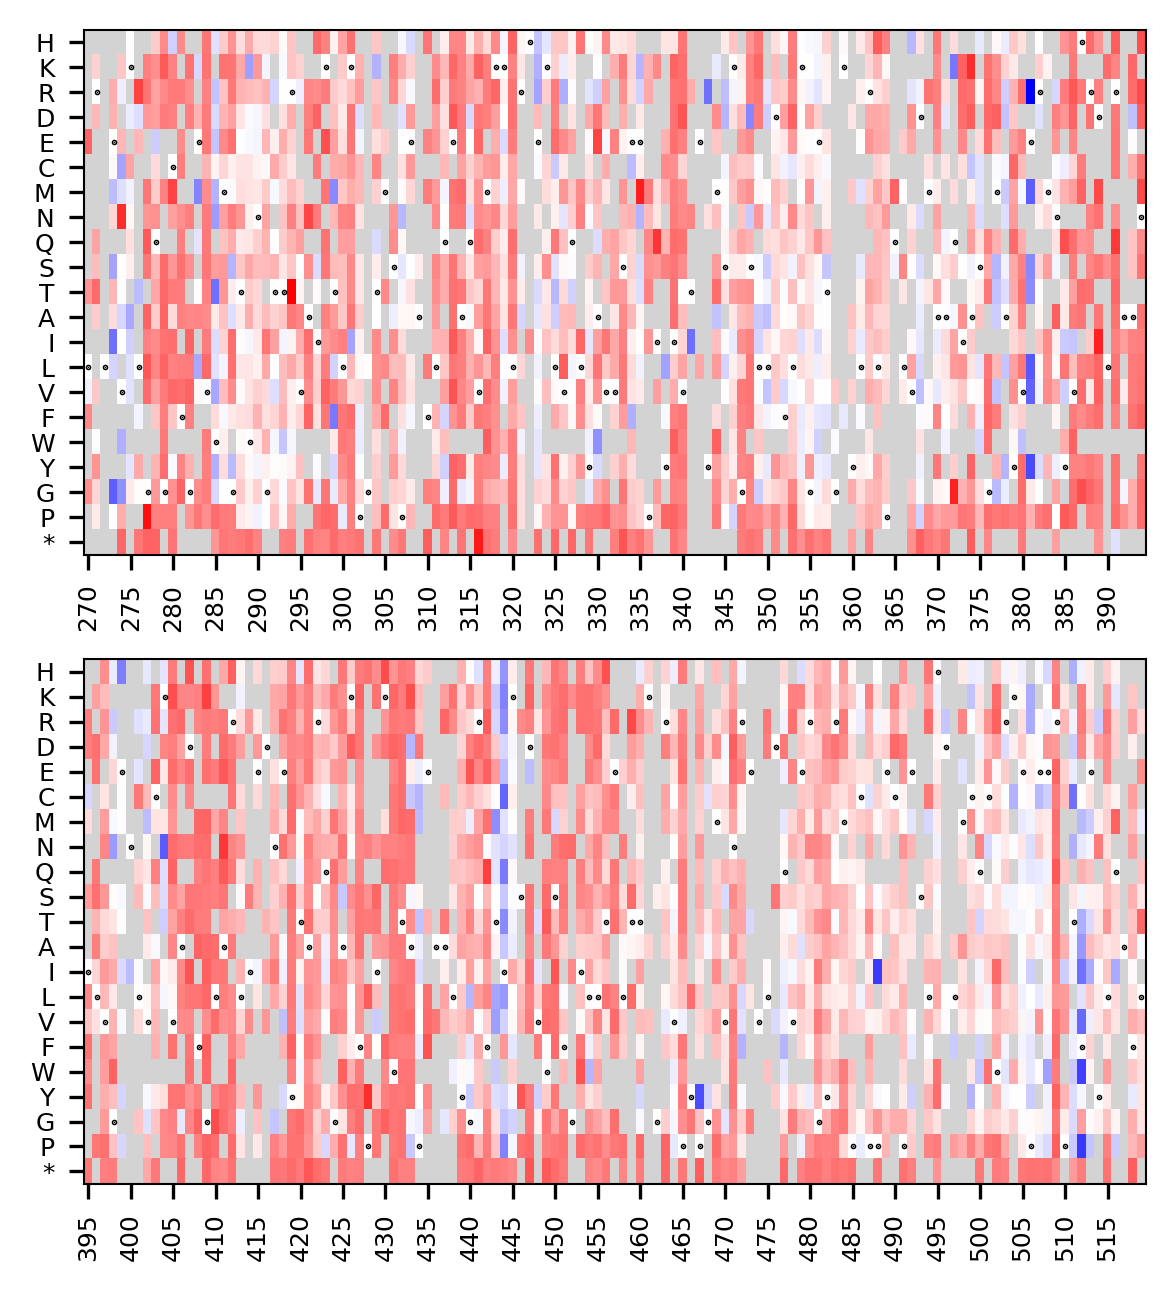

In [5]:
fig3

In [6]:
fig3.savefig('f3.png')